In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.path.dirname(os.path.abspath('spotify.ipynb'))

# Go up two levels to the root of the project
project_root = os.path.abspath(os.path.join(notebook_dir, os.pardir, os.pardir))

# Add the src directory to the Python path
src_dir = os.path.join(project_root, 'src')
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)
 
import pandas as pd
import pd_explain

usetex-False


We explore the Spotify dataset in order to find what characterizes popular songs.
First, we load the dataset into a dataframe.

In [2]:
spotify_all = (pd.read_csv(r"..\Datasets\spotify_all.csv"))

Then, we filter by popularity, to only select popular(greater than 65) songs, and query FEDEX for an explanation of the step.

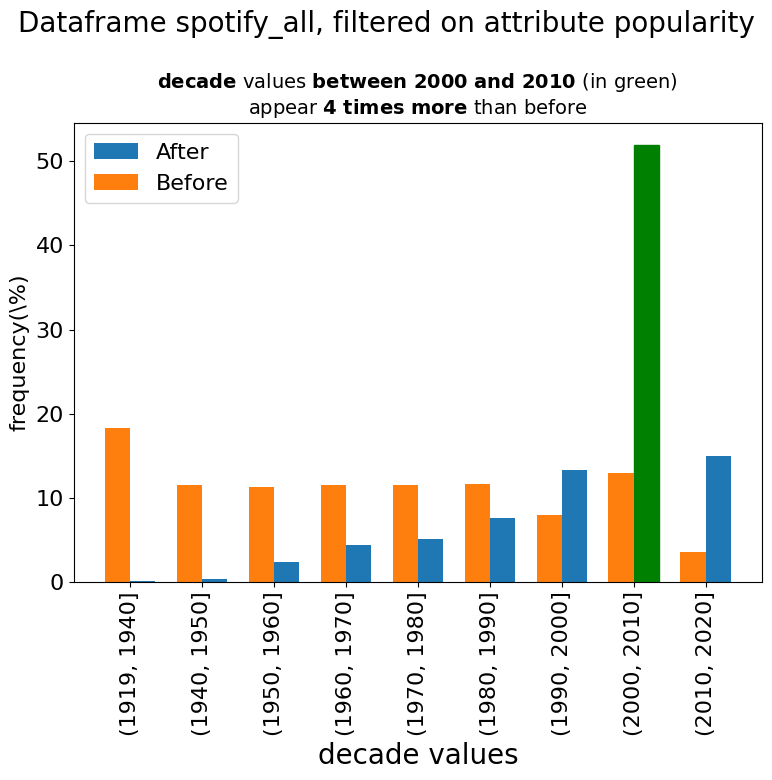

In [7]:
popular = spotify_all[spotify_all['popularity'] > 65]
popular.explain(explainer='fedex')

We conclude that popular songs are often newer. Lets consider the newer songs and assess our conclusion. 

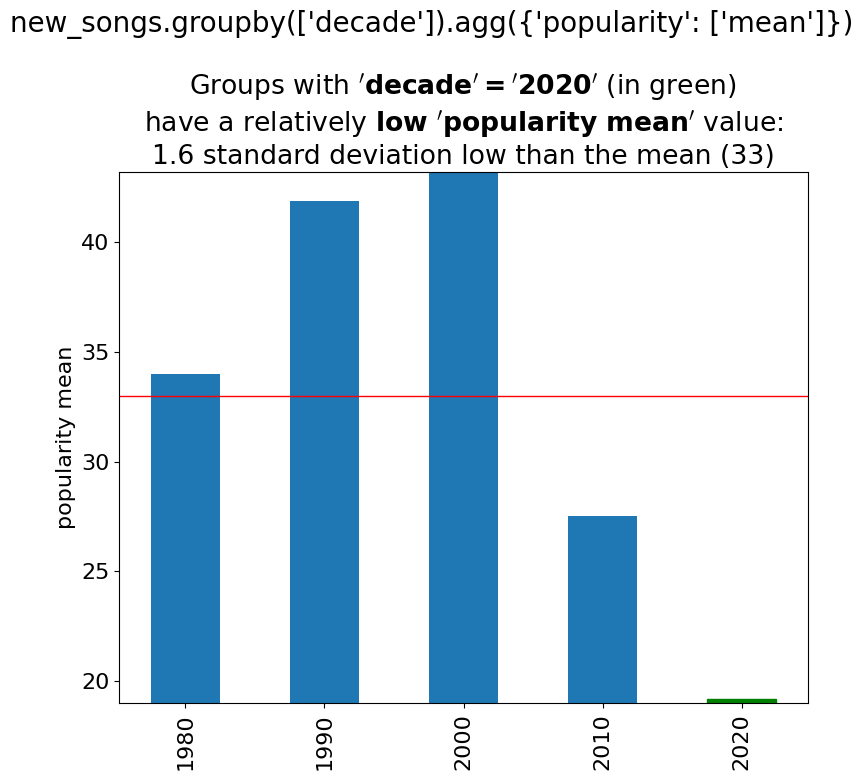

In [11]:
new_songs = spotify_all[spotify_all['decade'] >= 1980]
popularity_by_decade = new_songs.groupby(['decade']).popularity.mean()
popularity_by_decade.explain(explainer='fedex')

After grouping by decade, we see that our conclusion wasn't accurate- the mean popularity is much lower than expected in the 2020s.
We further investigate this occurance as an outlier:

'The highlighted outlier might have been\ncaused by rows that follow this predicate:\n\n$\\bf{explicit=0}$, \n\nBefore- 19.17101, After- 49.00526'

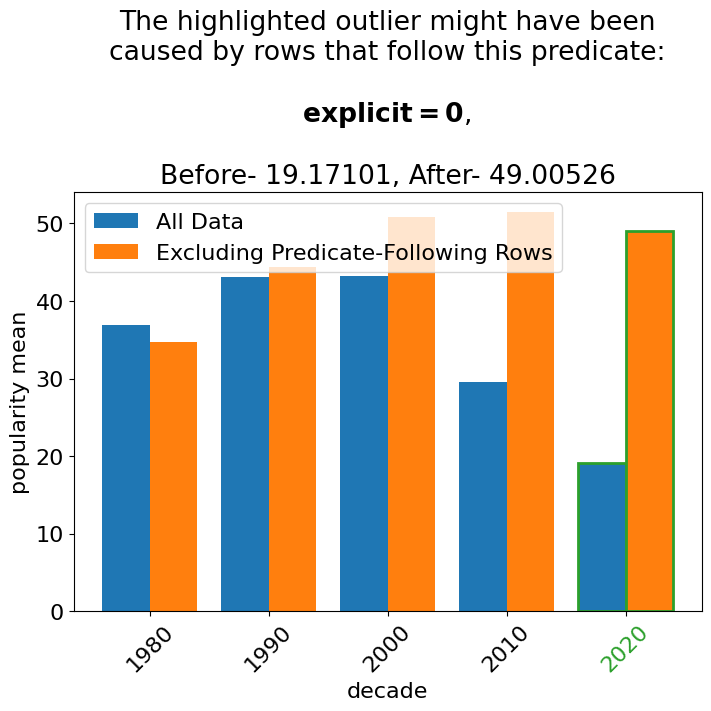

In [12]:
popularity_by_decade.explain(explainer='outlier', target=2020, dir=-1)

And we found that the outlier was caused by non-explicit songs, which were less popular in recent years thus decreasing the popularity mean. 